# Credit Card Fraud Detection

                                                                                      Camile Mendes - 28/10/2020

In this notebook, I test differents methods to detect fraud in transactions with a credit card. The notebook is organized in three parts: 

- Exploration the data and data preparation
- Building the differents methods
- Conclusions

The methods that I choose to analyse this problem are:

- Logistic Regression
- Random Forest
- Neural Network

# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Metric and etc
from sklearn.metrics import roc_auc_score  
from sklearn.metrics import roc_curve
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import auc
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics

# Logistic Regression
from sklearn.linear_model import LogisticRegression

# Random Forest
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier

# Neural Network with Keras
from tensorflow.python.keras.layers import Input, Dense
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.optimizers import Adam
from tensorflow.python.keras import regularizers
from tensorflow.python.keras.layers import Dropout

# Exploration the data and data preparation



## Exploring the Data

In [3]:
df = pd.read_csv("creditcard.csv")

The first thing to do when starting an analysis is understand your data and identify possible problems. So the first part of the project is the exploration of these data.

In [3]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [4]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
df.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

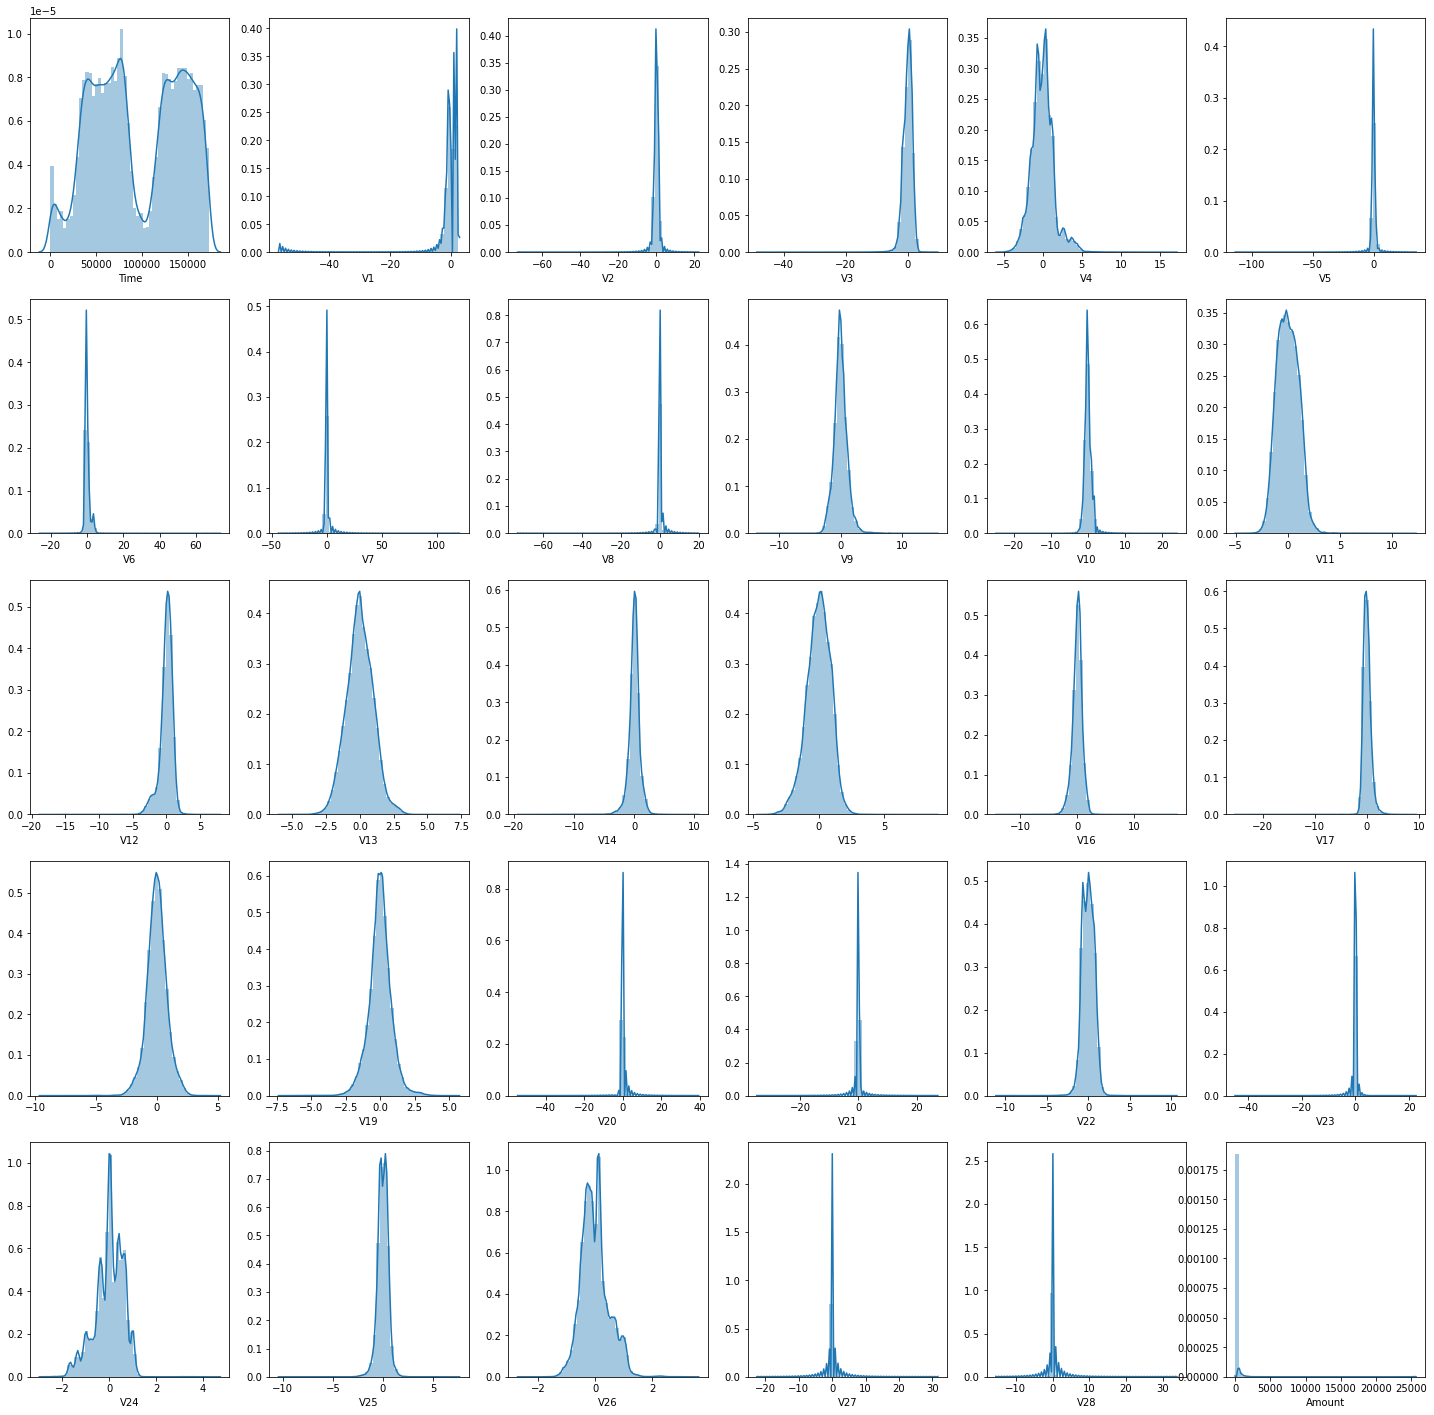

In [6]:
fig = plt.figure(figsize = (25, 25))
for i in range(1, len(df.columns) ):
    plt.subplot(5, 6, i)
    sns.distplot(df[df.columns[i-1]])
plt.show()

Now we have an idea of what the data looks like and I identify that the values of this features are much differents, so is important for our analysis scale the columns.


It is important to investigate some statistical characteristics too.

In [7]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


When exploring data, it is important to check if the data set has outliers, I did it using Boxplots.

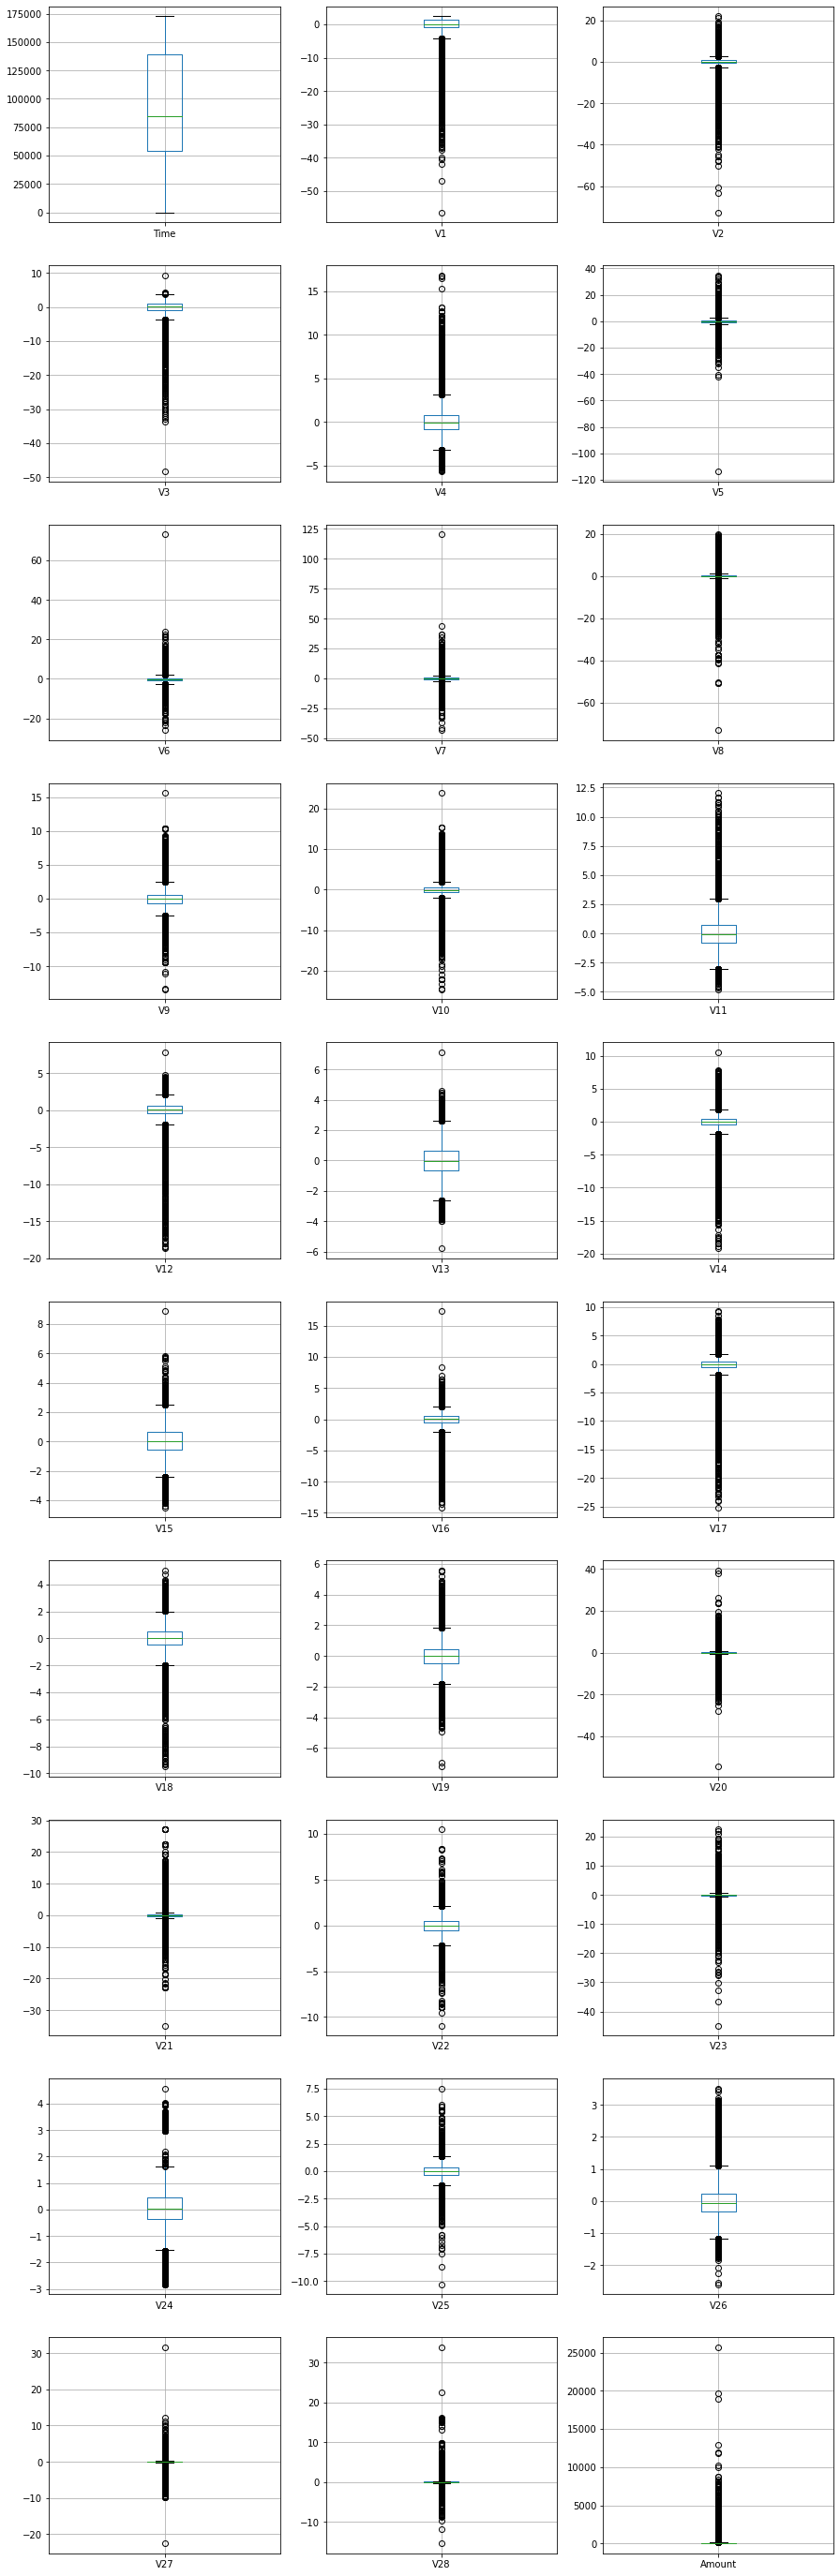

In [8]:
fig = plt.figure(figsize = (15, 50))
for i in range(1, len(df.columns) ):
    plt.subplot(10, 3, i)
    df.boxplot(df.columns[i-1])
plt.show()

Outliers have been identified, therefore, this should be considered when preparing the data.

It is also important to check for null number in the dataset.

In [9]:
df.isnull().sum().max()

0

The dataset haven't null values.

The next step will be to check for missing data.

In [10]:
df.count()

Time      284807
V1        284807
V2        284807
V3        284807
V4        284807
V5        284807
V6        284807
V7        284807
V8        284807
V9        284807
V10       284807
V11       284807
V12       284807
V13       284807
V14       284807
V15       284807
V16       284807
V17       284807
V18       284807
V19       284807
V20       284807
V21       284807
V22       284807
V23       284807
V24       284807
V25       284807
V26       284807
V27       284807
V28       284807
Amount    284807
Class     284807
dtype: int64

We don't have missing values.

In this dataset the "Class" is the identifier of the transaction, the "Class" show to us if the transaction is fraud or not fraud. So it is important to analyze the distribution of the "Class". 

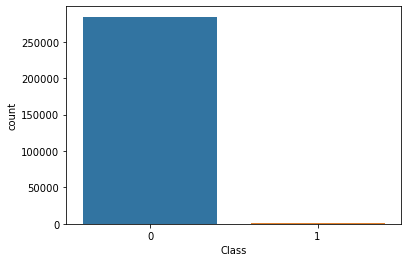

In [11]:
sns.countplot('Class', data=df)

In [12]:
df["Class"].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [13]:
perc_no_fraud = df['Class'].value_counts()[0]/len(df) * 100
perc_fraud = df['Class'].value_counts()[1]/len(df) * 100

print('Percentage of no Fraud: ', round(perc_no_fraud,2), '%')
print('Percentage ofFraud: ', round(perc_fraud,2), '%')


Percentage of no Fraud:  99.83 %
Percentage ofFraud:  0.17 %


We can note that the dataset is imbalanced. This should be considered when preparing the data.

In this dataset we have that 99.83% of the transactions are not fraud and 0.17% of the transactions are fraud. So if we used this imbalanced dataset in our analysis, we can obtain a lot of erros in the models. Thus it will be necessary to balance the dataset.

To identify which features have the greatest influence on whether a transaction is fraud or not, I analyzed the correlation between the characteristics and the class of the transaction.

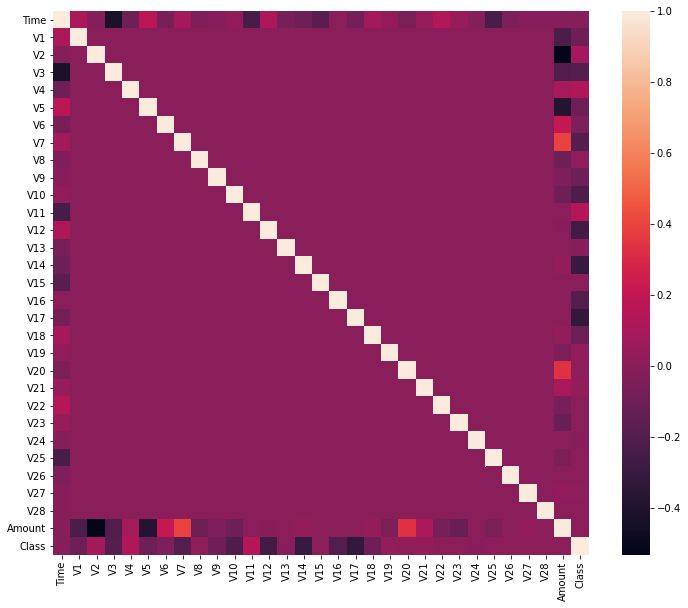

In [14]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr().round(3))

In this correlation matrix we can see that we have features with negative and positive correlation with regard to the detection of fraud in the transactions.

In [15]:
df.corr()["Class"].sort_values()

V17      -0.326481
V14      -0.302544
V12      -0.260593
V10      -0.216883
V16      -0.196539
V3       -0.192961
V7       -0.187257
V18      -0.111485
V1       -0.101347
V9       -0.097733
V5       -0.094974
V6       -0.043643
Time     -0.012323
V24      -0.007221
V13      -0.004570
V15      -0.004223
V23      -0.002685
V22       0.000805
V25       0.003308
V26       0.004455
Amount    0.005632
V28       0.009536
V27       0.017580
V8        0.019875
V20       0.020090
V19       0.034783
V21       0.040413
V2        0.091289
V4        0.133447
V11       0.154876
Class     1.000000
Name: Class, dtype: float64

It is important to remember that for a negative correlation, the lower the correlation value, the greater the chance of the transition being a fraud. As for a positive correlation, the higher the correlation value, the greater the chance of the transition being a fraud.

## Preparing the Data

The dataset is imbalanced, so we will balanced the data. We will resampling using Random over-sampling.

In [16]:
count_class_0, count_class_1 = df["Class"].value_counts()

df_class_0 = df[df["Class"] == 0]
df_class_1 = df[df["Class"] == 1]

In [17]:
df_class_1_over = df_class_1.sample(count_class_0, replace=True)
os_df = pd.concat([df_class_0, df_class_1_over], axis=0)

In [18]:
print('Random over-sampling:')
print(os_df["Class"].value_counts())

Random over-sampling:
1    284315
0    284315
Name: Class, dtype: int64


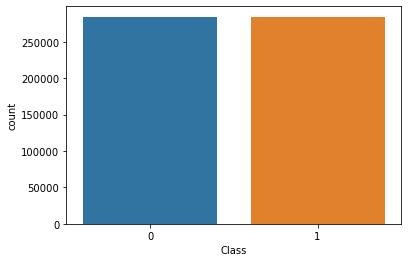

In [19]:
sns.countplot('Class', data=os_df)

Now we have a balanced dataset.

Now, we need detect the outliers of the dataset and remove them. I do this using the quantile.

In [20]:
lower_bound = 0.25
upper_bound = 0.75
res = os_df.quantile([lower_bound, upper_bound])
res

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0.25,46057.0,-2.869795,-0.144751,-5.118363,-0.107683,-1.803684,-1.574565,-3.104557,-0.204280,-2.322716,...,-0.169996,-0.538584,-0.239303,-0.400940,-0.315653,-0.288074,-0.063514,-0.059157,1.39,0.0
0.75,134755.0,1.040438,2.809299,0.340422,4.243069,0.475135,0.077379,0.268049,0.866673,0.172031,...,0.652683,0.577694,0.193731,0.371951,0.393319,0.323885,0.454982,0.219021,99.99,1.0


In [21]:
for i in range(1, len(os_df.columns) ):
    true_index = (res.loc[lower_bound][os_df.columns[i-1]] < os_df[os_df.columns[i-1]].values) & (os_df[os_df.columns[i-1]].values < res.loc[upper_bound][os_df.columns[i-1]])



In [22]:
false_index = ~true_index

In [23]:
new_df = os_df[true_index]
new_df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42958,41313.0,-13.897206,6.344280,-14.281666,5.581009,-12.887133,-3.146176,-15.450467,9.060281,-5.486121,...,3.058082,0.941180,-0.232710,0.763508,0.075456,-0.453840,-1.508968,-0.686836,9.99,1
42958,41313.0,-13.897206,6.344280,-14.281666,5.581009,-12.887133,-3.146176,-15.450467,9.060281,-5.486121,...,3.058082,0.941180,-0.232710,0.763508,0.075456,-0.453840,-1.508968,-0.686836,9.99,1
42549,41147.0,-5.314173,4.145944,-8.532522,8.344392,-5.718008,-3.043536,-10.989185,3.404129,-6.167234,...,2.331466,0.862996,-0.614453,0.523648,-0.712593,0.324638,2.245091,0.497321,88.23,1
251866,155535.0,0.711155,2.617105,-4.722363,5.842970,-0.600179,-1.646313,-2.785198,0.540368,-3.044029,...,0.360501,-0.865526,0.139978,-0.336238,0.128449,-0.155646,0.799460,0.392170,3.90,1


Here we don't have a new dataset that is already balanced and has had its outliers removed.

Now, we will select ours features and our label. 

In [24]:
features_cols = [
    'Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'
]
features = new_df[features_cols]
label = new_df["Class"]

We also need scaled the columns of the dataset.

In [25]:
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)
features_scaled

array([[-1.9899385 ,  0.60466588, -0.32298101, ...,  0.01418258,
         0.02108964, -0.95243903],
       [-1.98989605, -0.03199036, -0.07552124, ...,  0.32610597,
         0.61625199,  1.59769068],
       [-1.98989605,  0.16638606, -0.04202427, ...,  0.37311461,
         0.21813023, -0.9153049 ],
       ...,
       [-1.11674649, -1.15786426,  1.24685972, ...,  3.09247576,
         1.4541328 ,  2.28884024],
       [ 1.31071328,  0.47444037,  0.62826142, ...,  1.11823865,
         1.14189408, -0.90658974],
       [-0.95255745, -0.29770083,  0.13351782, ..., -0.52775208,
        -0.47449554, -0.30675983]])

Finally the dataset is ready to be analysed.

At this point I will divide the dataset into training data and test data. For this I will use a 70% sample for training the model and, consequently, 30% for the test.

In [26]:
x_train, x_test, y_train, y_test = train_test_split(
    features_scaled, label, test_size = 0.3, random_state=42
)

# Building the methods

Finally I will start to apply the machine learning methods.

## Logistic Regression

Create the model using the training data.

In [27]:
lr = LogisticRegression(random_state=42, solver="liblinear")
model = lr.fit(x_train, y_train)

Apply the model to obtain the results using the test data.

In [28]:
lr_predictions = model.predict(x_test)
lr_predictions

array([1, 1, 0, ..., 1, 0, 1])

To analysing the resul of Logistic Regression Method I found the confusion matix, the report of the classification, the accuracy, the F1-Score and the AUC Score.

In [29]:
confusion_matrix = pd.crosstab(y_test, lr_predictions) 
confusion_matrix

col_0,0,1
Class,,
0,56893,681
1,3126,22733


In [30]:
print(metrics.classification_report(y_test, lr_predictions))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97     57574
           1       0.97      0.88      0.92     25859

    accuracy                           0.95     83433
   macro avg       0.96      0.93      0.95     83433
weighted avg       0.96      0.95      0.95     83433



In [31]:
accuracy = accuracy_score(y_test, lr_predictions)
print('Accuracy for the Logistic Regression Method: ', round(accuracy,6)*100, '%')

Accuracy for the Logistic Regression Method:  95.4371 %


In [32]:
score = metrics.f1_score(y_test, lr_predictions)
print('F1-Score for the Logistic Regression Method: ', round(score,6)*100, '%')

F1-Score for the Logistic Regression Method:  92.2737 %


In [33]:
lr_auc_score = roc_auc_score(y_test, lr_predictions)
print('Score for the Logistic Regression Method: ', round(lr_auc_score,6)*100, '%')

Score for the Logistic Regression Method:  93.3643 %


## Random Forest

Create the model using the training data.

In [34]:
rf = RandomForestClassifier()
rf.fit(x_train, y_train)

RandomForestClassifier()

Apply the model to obtain the results using the test data.

In [35]:
rf_predictions = rf.predict(x_test)
rf_predictions

array([1, 1, 0, ..., 1, 0, 1])

To analysing the resul of Random Forest Method I found the confusion matix, the report of the classification, the accuracy, the F1-Score and the AUC Score.

In [36]:
confusion_matrix = pd.crosstab(y_test, rf_predictions) 
confusion_matrix

col_0,0,1
Class,,
0,57572,2
1,0,25859


In [37]:
print(metrics.classification_report(y_test, rf_predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     57574
           1       1.00      1.00      1.00     25859

    accuracy                           1.00     83433
   macro avg       1.00      1.00      1.00     83433
weighted avg       1.00      1.00      1.00     83433



In [38]:
accuracy = accuracy_score(y_test, rf_predictions)
print('Accuracy for the Random Forest Method: ', round(accuracy,6)*100, '%')

Accuracy for the Random Forest Method:  99.99759999999999 %


In [39]:
score = metrics.f1_score(y_test, rf_predictions)
print('F1-Score for the Random Forest Method: ', round(score,6)*100, '%')

F1-Score for the Random Forest Method:  99.9961 %


In [40]:
rf_auc_score = roc_auc_score(y_test, rf_predictions)
print('Score for the Random Forest Method: ', round(rf_auc_score,6)*100, '%')

Score for the Random Forest Method:  99.9983 %


## Neural Network

Create the Neural Network model using the training data.

In [41]:
nn = Sequential()
nn.add(Dense(units = 16, activation = 'relu', input_dim = 30))
nn.add(Dense(units = 16, activation = 'relu'))
nn.add(Dense(units = 1, activation = 'sigmoid'))
nn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

history = nn.fit(x_train, y_train, batch_size = 10, epochs = 50, verbose=0)

Apply the model to obtain the results using the test data.

In [42]:
nn_predictions = nn.predict(x_test)
nn_predictions= np.array([np.amax(x) for x in nn_predictions], dtype = int)
nn_predictions

array([1, 1, 0, ..., 1, 0, 1])

To analysing the resul of Neural Network Method I found the confusion matix, the report of the classification, the accuracy, the F1-Score and the AUC Score.

In [43]:
confusion_matrix = pd.crosstab(y_test, nn_predictions) 
confusion_matrix

col_0,0,1
Class,,
0,57572,2
1,4847,21012


In [44]:
print(metrics.classification_report(y_test, nn_predictions))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96     57574
           1       1.00      0.81      0.90     25859

    accuracy                           0.94     83433
   macro avg       0.96      0.91      0.93     83433
weighted avg       0.95      0.94      0.94     83433



In [45]:
accuracy = accuracy_score(y_test, nn_predictions)
print('Accuracy for the Neural Network Method with Keras: ', round(accuracy,5)*100, '%')

Accuracy for the Neural Network Method with Keras:  94.188 %


In [46]:
score = metrics.f1_score(y_test, nn_predictions)
print('F1-Score for the Neural Network Method with Keras: ', round(score,6)*100, '%')

F1-Score for the Neural Network Method with Keras:  89.655 %


In [47]:
nn_auc_score = roc_auc_score(y_test, nn_predictions)
print('Score for the Neural Network Method: ', round(nn_auc_score,6)*100, '%')

Score for the Neural Network Method:  90.6263 %


# Conclusion

To complete the project, I’ll compare the metrics used to analyze the three methods.

Accuracy comparison for the methods.

In [48]:
accuracy = accuracy_score(y_test, lr_predictions)
print('Accuracy for the Logistic Regression Method: ', round(accuracy,6)*100, '%')
accuracy = accuracy_score(y_test, rf_predictions)
print('Accuracy for the Random Forest Method: ', round(accuracy,6)*100, '%')
accuracy = accuracy_score(y_test, nn_predictions)
print('Accuracy for the Neural Network Method: ', round(accuracy,6)*100, '%')

Accuracy for the Logistic Regression Method:  95.4371 %
Accuracy for the Random Forest Method:  99.99759999999999 %
Accuracy for the Neural Network Method:  94.1882 %


For this dataset we can observe that the Random Forest Method is more accurete.

Comparison of the F1-Score for the methods

In [49]:
score = metrics.f1_score(y_test, lr_predictions)
print('F1-Score for the Logistic Regression Method: ', round(score,6)*100, '%')
score = metrics.f1_score(y_test, rf_predictions)
print('F1-Score for the Random Forest Method: ', round(score,6)*100, '%')
score = metrics.f1_score(y_test, nn_predictions)
print('F1-Score for the Neural Network Method: ', round(score,6)*100, '%')

F1-Score for the Logistic Regression Method:  92.2737 %
F1-Score for the Random Forest Method:  99.9961 %
F1-Score for the Neural Network Method:  89.655 %


Analyzing the F1-Score we can see that this value is higher for the Random Forest Method.

In [50]:
lr_auc_score = roc_auc_score(y_test, lr_predictions)
print('Score for the Logistic Regression Method: ', round(lr_auc_score,6)*100, '%')
rf_auc_score = roc_auc_score(y_test, rf_predictions)
print('Score for the Random Forest Method: ', round(rf_auc_score,6)*100, '%')
nn_auc_score = roc_auc_score(y_test, nn_predictions)
print('Score for the Neural Network Method: ', round(nn_auc_score,6)*100, '%')

Score for the Logistic Regression Method:  93.3643 %
Score for the Random Forest Method:  99.9983 %
Score for the Neural Network Method:  90.6263 %


In [51]:
lr_fpr, lr_tpr, threshold=roc_curve(y_test, lr_predictions)
rf_fpr, rf_tpr, threshold=roc_curve(y_test, rf_predictions)
nn_fpr, nn_tpr, threshold=roc_curve(y_test, nn_predictions)

<function matplotlib.pyplot.show(*args, **kw)>

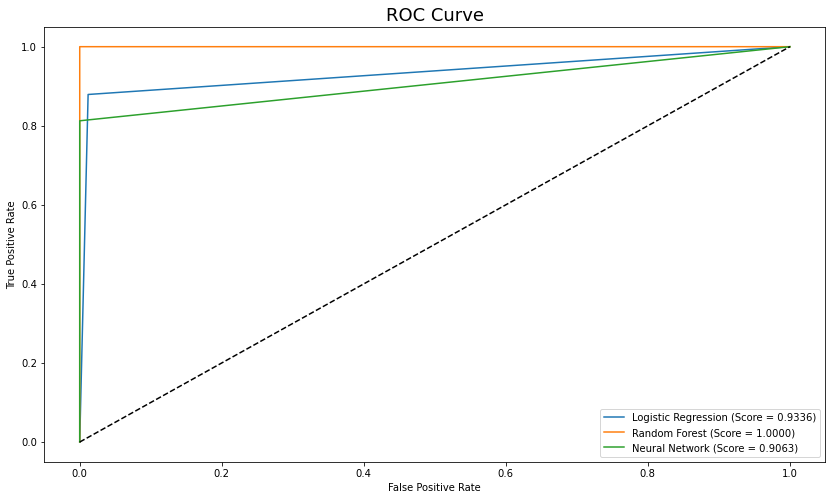

In [52]:
plt.figure(figsize=(14,8))
plt.title('ROC Curve', fontsize=18)
plt.plot(lr_fpr, lr_tpr, label="Logistic Regression (Score = %0.4f)" %  lr_auc_score)
plt.plot(rf_fpr, rf_tpr, label="Random Forest (Score = %0.4f)" % rf_auc_score)
plt.plot(nn_fpr, nn_tpr, label="Neural Network (Score = %0.4f)" % nn_auc_score)
plt.plot([0, 1], [0, 1],'--', color="Black")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show

Finally, analyzing the AUC Score and the ROC curve we observe that the Random Forest Method is better than the other methods.

### In summary, the best model to identify fraud in transictions on credit card is the Random Forest Method.